## Logistic Regression (Classification)

| x1 (hours) | x2 (attendance) | y (score) |
|    :---:   | :---:          |  :---:    |
| 10        | 5 | 90 |
| 9 |5 | 80 |
| 3 | 2 | 50 |
| 2 | 4 | 60 |
| 11 | 1 | 40 |

### Regression
* Hypothesis
 $$ H(x) = Wx$$

* Cost Function
$$ \text{cost}(W) = { 1 \over m} \sum_{i=1}^m (H(x^{(i)})-y^{(i)})^2 $$

* Gradient descent 
$$ W := W - \alpha { \partial \over \partial W} \text{cost}(W) $$

### Classification

#### Applications
* Spam Detection: Spam or Ham
* Facebook feed: show or hide
* Credit Card Fraudulent Transaction detection: legitimate or fraud 
  
#### 0, 1 encoding
* Spam Detection: Spam(1) or Ham(0)
* Facebook feed: show(1) or hide(0)
* Credit Card Fraudulent Transaction detection: legitimate(0) or fraud(1) 

#### Pass(1)/Fail(0) based on study hours

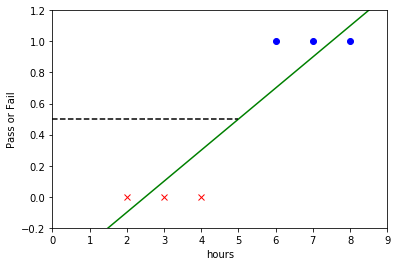

In [23]:
import matplotlib.pyplot as plt

fail_hrs = [2, 3, 4]
fail_out = [0, 0, 0]
pass_hrs = [6, 7, 8]
pass_out = [1, 1, 1]

plt.plot(fail_hrs,fail_out,'rx', pass_hrs, pass_out,'bo')
plt.axis([0, 9, -0.2, 1.2])
plt.plot([1, 9],[-0.3, 1.3], 'g-')
plt.plot([0, 5],[0.5, 0.5], 'k--')

plt.xlabel('hours')
plt.ylabel('Pass or Fail')
plt.show()

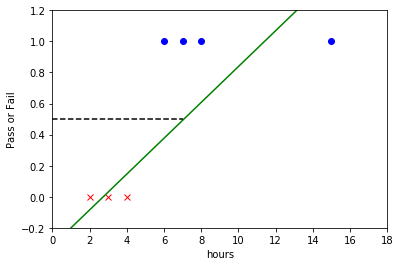

In [31]:
fail_hrs = [2, 3, 4]
fail_out = [0, 0, 0]
pass_hrs = [6, 7, 8, 15]
pass_out = [1, 1, 1, 1]

plt.plot(fail_hrs,fail_out,'rx', pass_hrs, pass_out,'bo')
plt.axis([0, 18, -0.2, 1.2])
plt.plot([1, 14],[-0.2, 1.3], 'g-')
plt.plot([0, 7],[0.5, 0.5], 'k--')

plt.xlabel('hours')
plt.ylabel('Pass or Fail')
plt.show()

* Problem of Linear Regression : Hypothesis can give values larger than 1 or less than 0
* Logistic Regression : Hypothesis can give values between 0 and 1

#### Sigmoid function (logistic function)

$$ \text{sigmoid function} = g(z) = {1 \over 1 + e^{-z}}$$

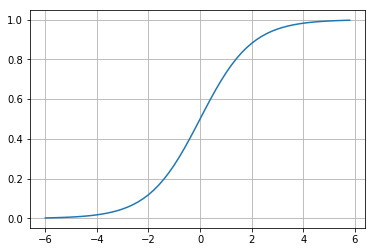

In [35]:
import numpy as np

def sigmoid(z):
    return 1/(1+np.exp(-z))

x = np.arange(-6,6,0.2)
y = sigmoid(x)

plt.plot(x,y)
plt.grid()
plt.show()

### Cost function

* for Linear Regression
 - Hypothesis 
 $$ H(x) = Wx + b$$
 - Cost Function
$$ \text{cost}(W,b) = { 1 \over m} \sum_{i=1}^m (H(x^{(i)})-y^{(i)})^2 $$


* for Logistic Regression
  - Hypothesis 
 $$ H(x) = { 1 \over 1 + e^{-Wx + b}}$$
  - Cost
  $$ \text{cost}(W,b) = {1 \over m} \sum_{i=1}^m c(H(x),y) $$
  where 
  $$ c(H(x),y) = 
      \begin{cases}
    -\log(H(x)) & \quad :y=1\\
    -\log(1-H(x)) & \quad :y=0
  \end{cases}
  $$

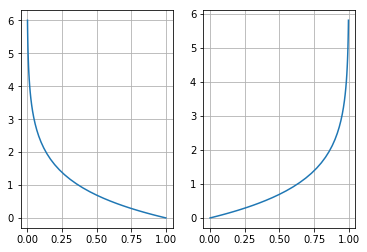

In [42]:
x = np.arange(-6,6,0.2)
z = sigmoid(x)

# for y =1, c1 = -log(H(x))
c1 = -np.log(z)
plt.subplot(121)
plt.plot(z,c1)
plt.grid(True)

# for y = 0, c2 = -log(1-H(x))
c2= -np.log(1-z)
plt.subplot(122)
plt.plot(z,c2)
plt.grid(True)
plt.show()

Cost function in one equation
  $$ \text{cost}(W,b) = {1 \over m} \sum_{i=1}^m -y^{(i)}   \log[H(x^{(i)})] - (1 -y^{(i)}) \log[1-H(x^{(i)})] $$
  
Gradient descent 
$$ W := W - \alpha { \partial \over \partial W} \text{cost}(W) $$

achieved by using library in TensorFlow as follows:

In [ ]:
# cost function
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis) + (1-y)*tf.log(1-hypothesis)))

# Minimize through gradiend descent
a = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

## Lab 5

### Logistic Regression

 $$ H(x) = { 1 \over 1 + e^{-Wx + b}}$$
 
  $$ \text{cost}(W,b) = {1 \over m} \sum_{i=1}^m -y^{(i)}   \log[H(x^{(i)})] - (1 -y^{(i)}) \log[1-H(x^{(i)})] $$

$$ W := W - \alpha { \partial \over \partial W} \text{cost}(W) $$

In [2]:
import tensorflow as tf

x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1.,1.+tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# Cost/Loss function
cost = -tf.reduce_mean( Y * tf.log(hypothesis) +
                       (1 - Y) * tf.log(1 - hypothesis) )

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis > 0.5, else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    #
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 400 == 0:
            print(step, cost_val)
            
    #
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nhypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)
    

0 1.2620785
400 0.4637182
800 0.4027163
1200 0.3706826
1600 0.34637964
2000 0.32555208
2400 0.30700496
2800 0.29027015
3200 0.27508724
3600 0.26126793
4000 0.2486574
4400 0.23712182
4800 0.22654401
5200 0.21682082
5600 0.20786159
6000 0.19958663
6400 0.1919257
6800 0.18481703
7200 0.17820631
7600 0.17204554
8000 0.16629225
8400 0.16090895
8800 0.1558623
9200 0.15112264
9600 0.14666356
10000 0.14246152

hypothesis:  [[0.02783787]
 [0.15471743]
 [0.29066235]
 [0.7879484 ]
 [0.9436376 ]
 [0.9815408 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


#### Classifying diabetes



In [6]:
import numpy as np
import tensorflow as tf

xy = np.loadtxt('./data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:,[-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1.,1.+tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# Cost/Loss function
cost = -tf.reduce_mean( Y * tf.log(hypothesis) +
                       (1 - Y) * tf.log(1 - hypothesis) )

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis > 0.5, else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    #
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            print(step, cost_val)
            
    #
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    # print("\nhypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)
    print( "\nAccuracy: ", a)

0 0.76460254
1000 0.6512922
2000 0.5895492
3000 0.55420053
4000 0.53251547
5000 0.5183397
6000 0.5085825
7000 0.5015866
8000 0.4964039
9000 0.49245986
10000 0.48938987

Accuracy:  0.7628459


#### Exercise

* CSV reading using tf.decode_csv
* Try other classification darta from Kaggle
  - https://www.kaggle.com